In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [19]:
survey = pd.read_csv('../BDA/CSV/survey_설문지.csv')

In [20]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [21]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datetime      86 non-null     object
 1   comment       84 non-null     object
 2   satisfaction  86 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [22]:
survey['datetime'] = pd.to_datetime(survey['datetime'])
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      86 non-null     datetime64[ns]
 1   comment       84 non-null     object        
 2   satisfaction  86 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.1+ KB


In [23]:
survey = survey.sort_values('datetime')

In [24]:
survey.set_index('datetime')

,comment,satisfaction
datetime,,
2019-01-01,관광 명소가 없다,1
2019-01-02,육아가 쉽다,4
2019-01-03,슈퍼까지 가는게 힘들어,1
2019-01-04,NaN,2
2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...
2019-04-28,골목이 좁고 무섭다,1
2019-04-29,상가의 활성화 활동을 좀더 행정이 뒷받침해 주길 바란다,1
2019-04-30,집세가 합리적이다,4


몇 점의 만족도가 제일 많은지 확인
- 1점과 2점이 1,2위로 많은 것을 확인 가능
- 1점과 2점의 comment에서 어떤 단어가 많은지 확인해서 문제점을 파악해보자.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

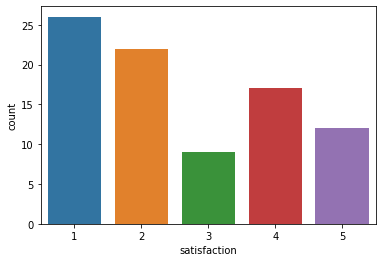

In [26]:
sns.countplot(data = survey, x = 'satisfaction')

In [27]:
# comment에서 한글만 남기자!
survey['comment'] = survey['comment'].str.replace('[a-zA-Z0-9]',"")
survey

,datetime,comment,satisfaction
23,2019-01-01,관광 명소가 없다,1
15,2019-01-02,육아가 쉽다,4
14,2019-01-03,슈퍼까지 가는게 힘들어,1
69,2019-01-04,NaN,2
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
71,2019-04-28,골목이 좁고 무섭다,1
45,2019-04-29,상가의 활성화 활동을 좀더 행정이 뒷받침해 주길 바란다,1
27,2019-04-30,집세가 합리적이다,4
34,2019-04-30,버스가 별로 안 온다,1


- 만족도가 1점인 comment들과 2점인 comment들에서 어떤 단어가 많은지 확인

In [28]:
score1 = survey.query('satisfaction == 1')
score2 = survey.query('satisfaction == 2')

In [29]:
score1

,datetime,comment,satisfaction
23,2019-01-01,관광 명소가 없다,1
14,2019-01-03,슈퍼까지 가는게 힘들어,1
83,2019-01-09,공원에 놀이기구가 너무 적다,1
77,2019-01-10,고속도로로 나가는 길이 좁아서 정체가 심하다. 확장해 주었으면 좋겠다,1
48,2019-01-11,가로수 낙엽 청소가 힘들다. 가로수 다 잘라버리자,1
47,2019-01-13,역앞에 자전거 주차장이 없어 불편함.,1
54,2019-01-14,"최근 지방 넘버의 차가 많다, 치안은 제대로 되어 있는가?",1
53,2019-01-22,관광지가 적다,1
44,2019-02-28,XXX 에 신호등이 없는 사거리가 때문에 사고가 날것 같아 두렵다. 신호를 해달라.,1
58,2019-03-01,버스 노선을 늘려 주길 바란다,1


In [30]:
score2

,datetime,comment,satisfaction
69,2019-01-04,NaN,2
4,2019-01-06,역앞 상가가 쓸쓸하다,2
28,2019-01-26,BBB의 교통 체증을 어떻게든 해 주었으면 한다.,2
6,2019-02-02,놀 장소가 없다,2
30,2019-02-02,상가에 더 많은 카페를 원한다,2
33,2019-02-07,워킹맘의 지원을 더 늘렸으면 좋겠다,2
60,2019-02-13,"옆동네에 생긴 쓰레기 처리시설이 걱정, 공해는 괜찮나?",2
20,2019-02-13,영화관이 아쉽다,2
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2
29,2019-02-16,상가에 지붕이 없어서 비가 오면 큰일이다,2


In [33]:
survey['len'] = survey['comment'].str.len()

In [35]:
survey.groupby('satisfaction').mean('len')
#만족도별로 댓글 길이의 평균 확인

,len
satisfaction,
1,22.615385
2,19.857143
3,21.250000
4,14.882353
5,21.833333


1점의 리뷰가 긴것을 확인할 수 있지만 큰 차이는 없으므로 리뷰의 길이가 만족도에 영향을 끼친다고는 할 수 없다.

<AxesSubplot:xlabel='satisfaction'>

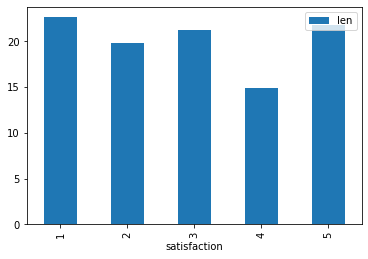

In [36]:
survey.groupby('satisfaction').mean('len').plot(kind = 'bar')

In [37]:
score1 = score1.dropna()

In [38]:
score2 = score2.dropna()

In [39]:
score2

,datetime,comment,satisfaction
4,2019-01-06,역앞 상가가 쓸쓸하다,2
28,2019-01-26,BBB의 교통 체증을 어떻게든 해 주었으면 한다.,2
6,2019-02-02,놀 장소가 없다,2
30,2019-02-02,상가에 더 많은 카페를 원한다,2
33,2019-02-07,워킹맘의 지원을 더 늘렸으면 좋겠다,2
60,2019-02-13,"옆동네에 생긴 쓰레기 처리시설이 걱정, 공해는 괜찮나?",2
20,2019-02-13,영화관이 아쉽다,2
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2
29,2019-02-16,상가에 지붕이 없어서 비가 오면 큰일이다,2
78,2019-02-18,시의 마스코트 같은 걸 만들면 어떨까?,2


In [50]:
from konlpy.tag import Mecab

In [51]:
# 한글 형태소 분석기 생성
mecab = Mecab()

# 한글 문자열 토큰화
score1['Tokens'] = score1['comment'].apply(lambda x: mecab.morphs(x))

# 단어 빈도 계산
word_counts = pd.Series([word for sublist in score1['comment'] for word in sublist]).value_counts()

# 결과 출력
print(word_counts)

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [53]:
# 한글 형태소 분석기 생성
mecab = Mecab()

# 한글 문자열 토큰화
score2['Tokens'] = score2['comment'].apply(lambda x: mecab.morphs(x))

# 단어 빈도 계산
word_counts = pd.Series([word for sublist in score2['comment'] for word in sublist]).value_counts()

# 결과 출력
print(word_counts)

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

## 결론

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

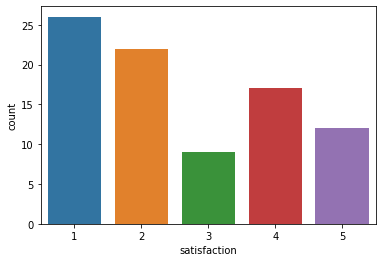

In [54]:
sns.countplot(data=survey,x='satisfaction')

In [55]:
score1

,datetime,comment,satisfaction
23,2019-01-01,관광 명소가 없다,1
14,2019-01-03,슈퍼까지 가는게 힘들어,1
83,2019-01-09,공원에 놀이기구가 너무 적다,1
77,2019-01-10,고속도로로 나가는 길이 좁아서 정체가 심하다. 확장해 주었으면 좋겠다,1
48,2019-01-11,가로수 낙엽 청소가 힘들다. 가로수 다 잘라버리자,1
47,2019-01-13,역앞에 자전거 주차장이 없어 불편함.,1
54,2019-01-14,"최근 지방 넘버의 차가 많다, 치안은 제대로 되어 있는가?",1
53,2019-01-22,관광지가 적다,1
44,2019-02-28,XXX 에 신호등이 없는 사거리가 때문에 사고가 날것 같아 두렵다. 신호를 해달라.,1
58,2019-03-01,버스 노선을 늘려 주길 바란다,1


In [56]:
score2

,datetime,comment,satisfaction
4,2019-01-06,역앞 상가가 쓸쓸하다,2
28,2019-01-26,BBB의 교통 체증을 어떻게든 해 주었으면 한다.,2
6,2019-02-02,놀 장소가 없다,2
30,2019-02-02,상가에 더 많은 카페를 원한다,2
33,2019-02-07,워킹맘의 지원을 더 늘렸으면 좋겠다,2
60,2019-02-13,"옆동네에 생긴 쓰레기 처리시설이 걱정, 공해는 괜찮나?",2
20,2019-02-13,영화관이 아쉽다,2
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2
29,2019-02-16,상가에 지붕이 없어서 비가 오면 큰일이다,2
78,2019-02-18,시의 마스코트 같은 걸 만들면 어떨까?,2


- 만족도가 1,2점인 코멘트가 많다.
- 만족도가 1점인 것을 확인해보면 무언가 부족하거나 장소가 위험하다는 평이 많다.
- 만족도가 2점인 경우도 무언가 부족하다는 내용이 많다.
- 결과적으로 개선을 위해서 장소에 대해 많은 시설과 공간의 확장이 필요해 보인다,